# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [2]:
athletes = pd.read_csv("athletes.csv")

In [3]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [7]:
athletes.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [60]:
# Obtendo 3000 amostra de alturas de atletas
sample_height = get_sample(athletes, 'height', 3000)

In [160]:
# Definindo o nível de signifincância utiizado em todos os teste de hipóteses
alfa = 0.05

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [61]:
sct.shapiro(sample_height)

(0.9961519837379456, 5.681722541339695e-07)

In [161]:
def q1():
    # Retornando a verificação se o p-value é maior que o nível de significância alfa
    return sct.shapiro(sample_height)[1] > alfa
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

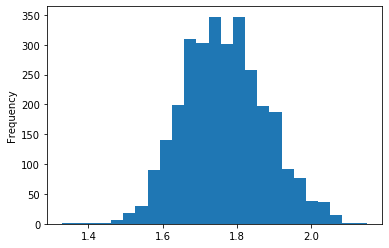

In [64]:
sample_height.plot(kind='hist', bins=25)

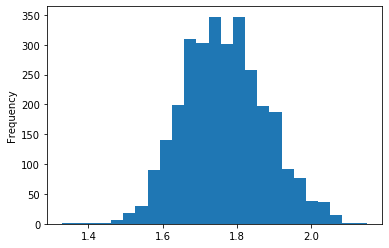

In [65]:
sample_height.plot(kind='hist', bins=25)

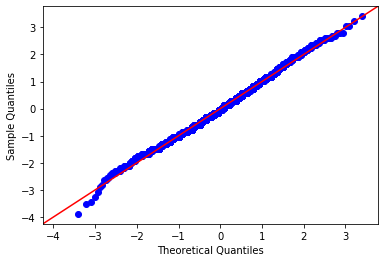

In [66]:
sm.qqplot(sample_height, fit=True, line="45");

* A amostra aparenta uma distribuição normal porém, ao fazer o teste de shapiro-wilks, verificamos que essa hipótese nula é falsa 

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [67]:
sct.jarque_bera(sample_height)

(13.03363513594265, 0.001478366424594868)

In [68]:
def q2():
    # Retorne aqui o resultado da questão 2.
    alfa = 0.05
    return sct.jarque_bera(sample_height)[1]> alfa
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

* Com o teste de jarque bera é reforçada a negação da hipótese nula, ou seja, a amostra não seque uma distrinuição normal sob o nível de significância de 5%

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [95]:
#Obtendo a amostra de pesos de 3000 atletas
sample_weight = get_sample(athletes, 'weight', 3000)

#Visualizando o p-value para o teste
sct.normaltest(sample_weight)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

In [42]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return sct.normaltest(sample_weight)[1] > 0.05
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

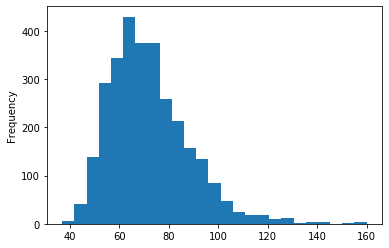

In [53]:
sample_weight.plot(kind='hist', bins=25)
plt.show()

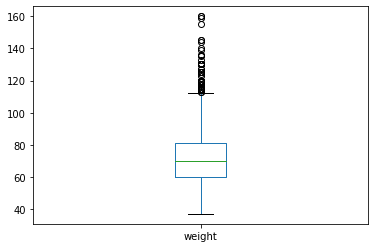

In [52]:
sample_weight.plot(kind='box')
plt.show()

* Com os gráficos acima, facilmente, podemos perceber a assimetria da distribuição

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [205]:
# Calculandodo o logarítmo para a amostra de pesos dos atletas
log_weight = np.log10(sample_weight)

In [206]:
def q4():
    # Comparando o p-value da nova amostra 
    return sct.normaltest(log_weight)[1]>0.05
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

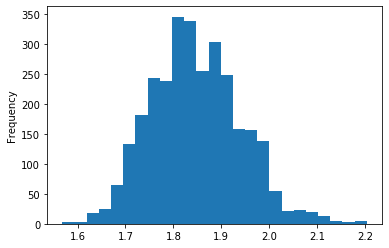

In [207]:
log_weight.plot(kind='hist', bins=25)
plt.show()

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [146]:
# Filtrando a nacionalidade 
bra = athletes[athletes['nationality']=='BRA']['height']
usa = athletes[athletes['nationality']=='USA']['height']
can = athletes[athletes['nationality']=='CAN']['height']

# Visualização básica de cada nacionalidade 
pd.DataFrame({'BRA': bra.describe(), 'USA': usa.describe(),'CAN': can.describe()})

,BRA,USA,CAN
count,476.000000,560.000000,320.000000
mean,1.764034,1.787768,1.758594
std,0.117388,0.118962,0.118036
min,1.330000,1.450000,1.450000
25%,1.680000,1.710000,1.670000
50%,1.755000,1.780000,1.750000
75%,1.840000,1.880000,1.830000
max,2.110000,2.210000,2.080000


In [190]:
# Exibindo p-value do resultado do T-test 
sct.ttest_ind(bra, usa, equal_var= False, nan_policy='omit')

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)

In [163]:
def q5():
    return sct.ttest_ind(bra, usa, nan_policy='omit')[1] > alfa
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [193]:
# Exibindo p-value do resultado do T-test 
sct.ttest_ind(bra, can, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=0.6389304914365109, pvalue=0.5230827295440921)

In [179]:
def q6():
    return sct.ttest_ind(bra, can, nan_policy='omit')[1] > alfa
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [185]:
# Exibindo p-value do resultado do T-test  
sct.ttest_ind(usa, can, nan_policy='omit')

Ttest_indResult(statistic=3.5094939427693164, pvalue=0.0004717857152394269)

In [192]:
def q7():
    return sct.ttest_ind(usa, can, equal_var=False, nan_policy='omit')[1].round(8)
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?